<a href="https://colab.research.google.com/github/anisfreelancer71/mycode/blob/main/27_1_Data_Science_in_Marketing_Customer_Segmentation_with_Python_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mempersiapkan Library dan Data
Kamu sangat bersemangat untuk segera menyelesaikan masalah tersebut. Kamu mulai dari mencari tau data apa yang tersedia dan mengumpulkan data yang dibutuhkan terkait pelanggan. Seperti dikebanyakan tempat, kamu berkoordinasi dengan tim data engineer untuk mendapatkan data yang di butuhkan dan berdiskusi dengan tim bisnis untuk memahami arti dari data-data yang kamu miliki.
Sampai akhirnya kamu mendapatkan data yang kamu perlukan.

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:
####1. Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
####2. Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
####3. Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
####4. Umur: Umur dari pelanggan dalam format angka
###5. Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
####6. Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
####7. Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.



#Mempersiapkan Library
Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:
###1. Pandas, digunakan untuk melakukan pemrosesan analisis data
###2. Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
###3. Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
###4. Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
###5. kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
###6. Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.
##Tugas:
Lakukan import library yang dibutuhkan pada proyek ini.


In [2]:
pip install KModes

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path


#Membaca Data Pelanggan
Langkah pertama yang perlu di lakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe.
##Tugas:
Kamu akan menggunakan fungsi read_csv yang ada di pandas untuk memasukkan data dan kemudian menampilkan 5 data teratas.
Jika kamu melakukannya dengan benar maka akan mendapatkan hasil sebagai berikut:


In [14]:
import pandas as pd

# import dataset
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# menampilkan data
print(df.head())


  Customer_ID       Nama Pelanggan Jenis Kelamin  Umur       Profesi  \
0    CUST-001         Budi Anggara          Pria    58    Wiraswasta   
1    CUST-002     Shirley Ratuwati        Wanita    14       Pelajar   
2    CUST-003         Agus Cahyono          Pria    48  Professional   
3    CUST-004     Antonius Winarta          Pria    53  Professional   
4    CUST-005  Ibu Sri Wahyuni, IR        Wanita    41    Wiraswasta   

  Tipe Residen  NilaiBelanjaSetahun  
0       Sector              9497927  
1      Cluster              2722700  
2      Cluster              5286429  
3      Cluster              5204498  
4      Cluster             10615206  


#Melihat Informasi dari Data
Selanjutnya kamu perlu melihat informasi dari data yang ada. Sehingga dengan kamu bisa mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values,  dan juga mengetahui tipe data dengan mudah.
##Tugas:
Gunakan fungsi info() dari pandas untuk melihat informasi dari data kita. Jika kamu melakukan dengan benar, kamu akan mendapatkan hasil sebagai berikut:


In [15]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# Menampilkan informasi data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


#Kesimpulan
Setelah melakukan pemanggilan data dan melihat informasi data yang kamu miliki, kamu akhirnya mengetahui bahwa:
Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
Tidak ada nilai null pada data
Dua kolom memiliki tipe data numeric dan lima data bertipe string
##Tips:
Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.


#Melakukan Eksplorasi Data
Pada tahap sebelumnya kamu sudah menyiapkan data dan melihat informasi dasar dari data yang kamu miliki.
Selanjutnya kamu perlu melakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Kamu akan melakukan eksplorasi untuk data numerik dan juga data kategorikal.
#Eksplorasi Data Numerik
Pertama kamu perlu melihat distribusi data dari data yang berjenis numerik. Disini kamu akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kamu perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.
##Tugas:
Buatlah boxplot dan histogram untuk kolom Umur dan juga NilaiBelanjaSetahun. Jika kamu melakukan dengan benar, kamu akan mendapatkan hasil sebagai berikut:
Note: Untuk melihat keseluruhan grafik dapat dilakukan dengan klik kanan pada grafik dan pilih "Open image in new tab".


<ipython-input-16-111096cc2e2d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])
<ipython-input-16-111096cc2e2d>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[kol], ax = axs[i][1])


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  anchor: (float, float) or {'C', 'SW', 'S', 'SE', 'E', 'NE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or float
  autoscale_on: bool
  autoscalex_on: unknown
  autoscaley_on: unknown
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: float or None
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  mouseover: bool
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  ras

<Figure size 640x480 with 0 Axes>

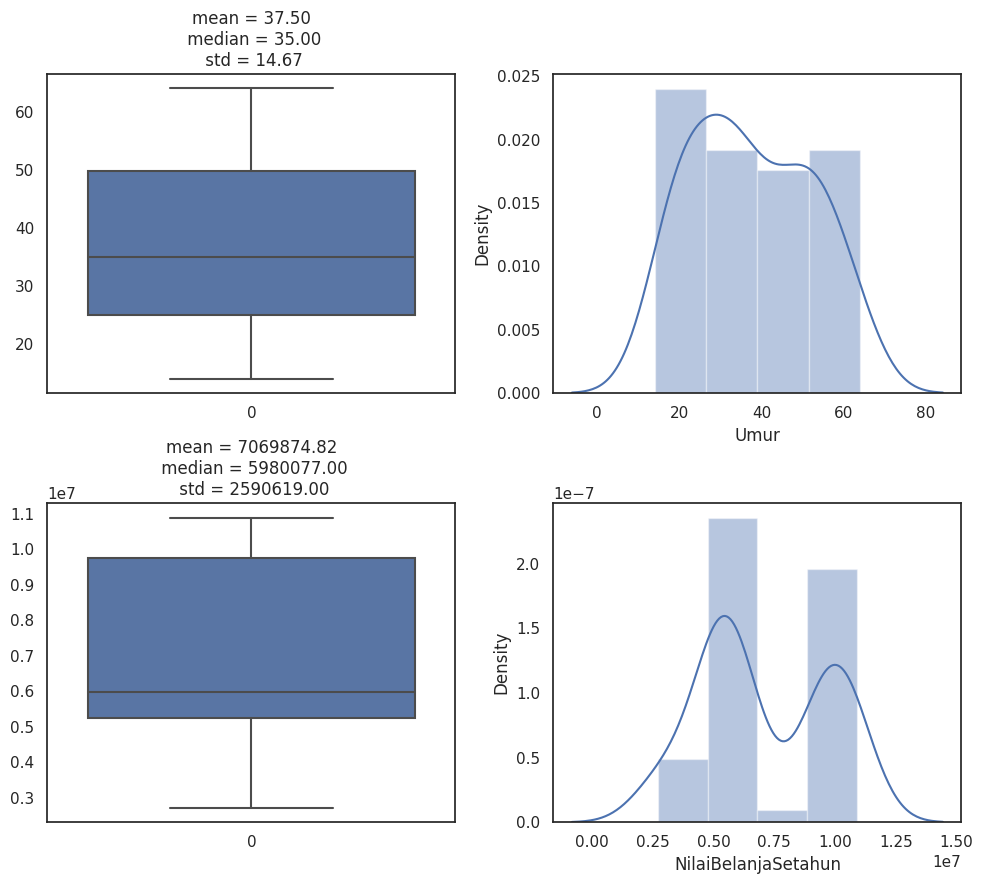

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()

# Fungsi untuk membuat plot
def observasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat Plot untuk data numerik
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)


#Eksplorasi Data Kategorikal
Selain data numerikal, kamu juga perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen. Kamu dapat melakukan hal ini dengan menggunakan countplot dari library seaborn.
##Tugas:
Buatlah countplot dengan menggunakan seaborn untuk kolom-kolom yang berjenis kategorikal. Jika kamu melakukan dengan benar kamu akan mendapatkan hasil sebagai berikut:
Note: Untuk melihat keseluruhan grafik dapat dilakukan dengan klik kanan pada grafik dan pilih "Open image in new tab".


<Figure size 640x480 with 0 Axes>

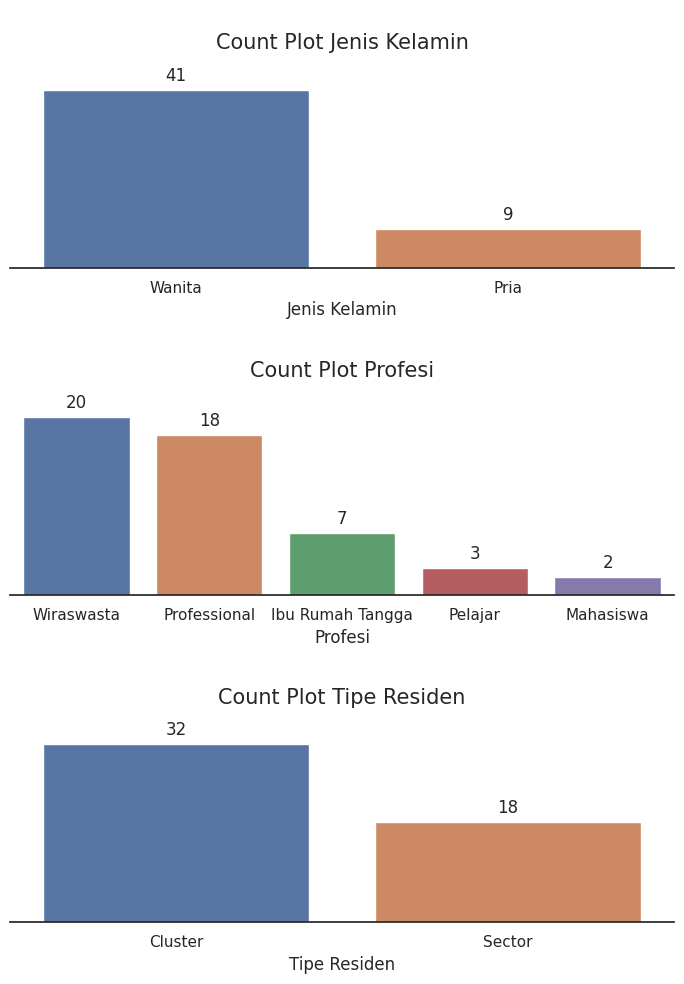

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='white')

# Membaca data dari URL
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

# Menghapus frame sebelum membuat plot
plt.clf()

# Menyiapkan kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']

# Membuat canvas
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Membuat plot untuk setiap kolom kategorikal
for i, kol in enumerate(kolom_kategorikal):
    # Membuat Plot
    sns.countplot(data=df, x=kol, order=df[kol].value_counts().index, ax=axs[i])
    axs[i].set_title('\nCount Plot %s\n' % (kol), fontsize=15)

    # Memberikan anotasi
    for p in axs[i].patches:
        axs[i].annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='center',
                        xytext=(0, 10),
                        textcoords='offset points')

    # Setting Plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)

# Menyematkan layout
plt.tight_layout()

# Tampilkan plot
plt.show()



#Kesimpulan
Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:
Rata-rata dari umur pelanggan adalah 37.5 tahun
Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor
##Tips:
Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa univariate maupun multivariate data eksplorasi. Eksplorasi Data Univariate melihat karakteristik tiap-tiap feature, misalnya dengan melihat statistik deskriptif, membuat histogram, kdeplot, countplot maupun boxplot. Sedangkan untuk Eksplorasi Data Multivariate, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya.


#Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.
Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.
Setelah kemarin kita mempersiapkan data sekaligus melakukan Cleansing, maka sekarang saatnya kita untuk membuat model yang tepat untuk memprediksi churn pelanggan.
##Tugas dan Langkah
Pada project part 1 kemarin kita telah melakukan Cleansing Data. Sekarang, sebagai data scientist kamu diminta untuk membuat model yang tepat.
Pada tugas kali ini, kamu akan melakukan Pemodelan Machine Learning dengan menggunakan data bulan lalu, yakni Juni 2020.
Langkah yang akan dilakukan adalah,
Melakukan Exploratory Data Analysis
Melakukan Data Pre-Processing
Melakukan Pemodelan Machine Learning
Menentukan Model Terbaik
Notice

Sahabat data DQLab, apabila menemukan warning sign seperti pada gambar di atas setelah menekan tombol submit, tidak perlu khawatir ya. Warning sign ini bukan merupakan sebuah error dan tidak mempengaruhi ketepatan dari jawaban sahabat data DQLab. Selamat dan semangat belajar selalu!
##Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,
####1. Pandas
(Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
#####read_csv() digunakan untuk membaca file csv
#####replace() digunakan untuk mengganti nilai
#####value_counts() digunakan untuk mengitung unik dari kolom
#####drop() digunakan untuk menghapus
#####describe() digunakan untuk melihat deskripsi datanya
#####value_counts() digunakan untuk mengitung unik dari kolom
####2. Matplotlib
adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
#####figure() digunakan untuk membuat figure gambar baru
#####subplots()digunakan untuk membuat gambar dan satu set subplot
#####title()digunakan untuk memberi judul pada gambar
#####ylabel()digunakan untuk memberi label sumbu Y pada gambar
#####xlabel()digunakan untuk memberi label sumbu Y pada gambar
#####pie()digunakan untuk membuat pie chart
###3. Seaborn
membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.
#####countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
#####heatmap() Plot rectangular data as a color-encoded matrix
###4. Scikit-learn a
dalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.
#####LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
#####train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
#####LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
#####RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
#####confusion_matrix() digunakan untuk membuat confusion matrix
#####classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model
###5. Xgboost
adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)
#####XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier
###6. Pickle
mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.
#####dump() digunakan untuk menyimpan

#Import Library yang dibutuhkan
Lakukan import library sebagai berikut.


In [20]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path


#Data yang Digunakan
Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

Untuk detil datanya adalah sebagai berikut:
#####UpdatedAt Periode of Data taken
#####customerID Customer ID
#####gender Whether the customer is a male or a female (Male, Female)
#####SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
#####Partner Whether the customer has a partner or not (Yes, No)
tenure Number of months the customer has stayed with the company
#####PhoneService Whether the customer has a phone service or not (Yes, No)
#####InternetService Customer’s internet service provider (Yes, No)
#####StreamingTV Whether the customer has streaming TV or not (Yes, No)
#####PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
#####MonthlyCharges The amount charged to the customer monthly
#####TotalCharges The total amount charged to the customer
#####Churn Whether the customer churned or not (Yes, No)
Next
#File Unloading
Lakukan import dataset ke dalam workspace dengan menggunakan read_csv dan tampilkan juga bentuk atau shape dari dataset tersebut beserta 5 data teratas.

sumber dataset : https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv


In [21]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
#Tampilkan bentuk dari dataset
print(df_load.shape)
#Tampilkan 5 data teratas
print(df_load.head())
#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())


(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

#Exploratory Data Analysis
Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:
####Univariat Analysis — analisis deskriptif dengan satu variabel.
####Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
####Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.
Dalam kasus ini, kamu diminta untuk melihat persebaran dari:
####Prosentase persebaran data Churn dan tidaknya dari seluruh data
####Persebarang data dari variable predictor terhadap label (Churn)


In [22]:
#import matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns


#Memvisualisasikan Prosentase Churn
Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart
Berikut adalah hasil yang seharusnya dihasilkan :


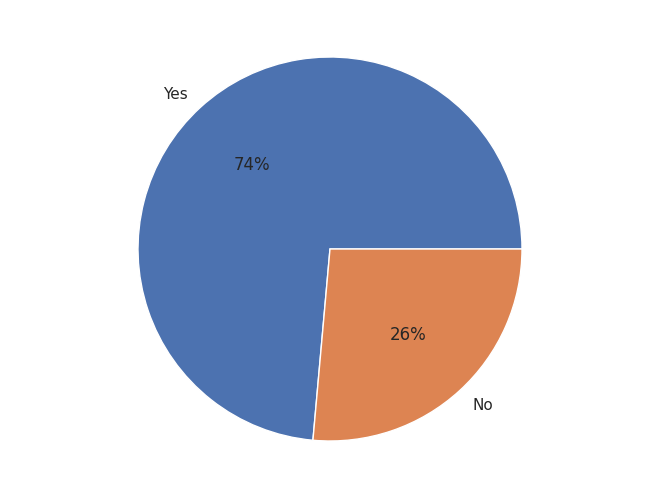

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

# Membuat pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes', 'No']
churn = df_load['Churn'].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()


#Mempersiapkan Data Sebelum Permodelan
Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kamu harus mempersiapkan data yang kamu miliki sebelum digunakan untuk melakukan permodelan. Sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.
Kamu berencana akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes. Salah satu faktor utama dalam algoritma ini adalah kamu perlu menggunakan data yang skala antar variabelnya setara. Selain itu kita juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.
##Standarisasi Kolom Numerik
Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kamu perlu menjadikan data-data numerik yang kamu miliki berada pada satu skala. Hal ini dapat dilakukan dengan melakukan standardisasi data yang kamu miliki. Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.
###Tugas:
Lakukan standardisasi kolom-kolom numerik dan tampilkan hasilnya. Selain itu tampilkan deskriptif statistik sebelum dan sesudah standardisasi untuk melihat perbedaannya.
Jika dilakukan dengan benar, makan kamu akan mendapatkan hasil sebagai berikut:


In [24]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import StandardScaler

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   -0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


#Konversi Kategorikal Data dengan Label Encoder
Selanjutnya kamu perlu merubah kolom-kolom yang berjenis kategorikal menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.
Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan diubah menjadi angka 0 dan teks "Wanita" akan diuubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum digunakan pada algoritma K-Prototype.
##Tugas:
Ubahlah kolom-kolom kategorikal pada data set kamu menjadi numerik menggunakan LabelEncoder dari sklearn. Kemudian tampilkan hasil lima teratasnya.
Jika dilakukan dengan benar maka kamu akan mendapatkan hasil sebagai berikut:


In [25]:
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

kolom_numerik  = ['Umur','NilaiBelanjaSetahun']
df_std = StandardScaler().fit_transform(df[kolom_numerik])
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
df_encode = df[kolom_kategorikal].copy()
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index=True, right_index=True, how='left')
print(df_model.head())


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


#Kesimpulan
Sampai di sini, kamu sudah menggunakan kemampuan kamu dalam menyiapkan library dan data. Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan.
##Tips:
Pada aplikasi di industri, proses pemrosesan data ini termasuk yang paling banyak menghabiskan waktu bagi data scientist. Selain yang sudah kita lakukan masih banyak teknik lain yang perlu dilakukan. Sebagai contoh kadang kita perlu melakukan data imputation ketika ada null data di dataset yang akan kita gunakan. Selain itu kadang kita juga perlu melakukan transformasi variabel, misalnya ketika kita memiliki distribusi data yang condong ke salah satu sisi (skew data). Tambahan contoh lainnya yaitu terkadang kita perlu menangani pencilan yang ada di data kita.
#Penutup
Congratulation!
Kamu sudah berhasil menyelesaikan modul ini. Tapi, perjalan belajarmu tidak berhenti sampai di sini.
Masih banyak yang perlu kamu pelajari. Pada bagian selanjutnya kamu akan melakukan segmentasi pelanggan menggunakan K-Prototypes algoritma menggunakan df_model yang sudah kamu pelajari pada modul ini.
Jangan pernah bosan dan mudah menyerah mempelajari data science. Tetap berlatih dan asah kemampuan data science mu di DQLab.
Terbuka kesempatan besar untuk kamu menjadi talenta data di industri.
Next
